In [1]:
!pip install easyocr --user
!pip install Pillow==9.0.0
!pip install --upgrade Pillow



  Using cached Pillow-9.0.0-cp39-cp39-win_amd64.whl (3.2 MB)
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.4.0
    Uninstalling pillow-10.4.0:
      Successfully uninstalled pillow-10.4.0



  Using cached pillow-10.4.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.0.0
    Uninstalling Pillow-9.0.0:
      Successfully uninstalled Pillow-9.0.0


In [2]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
image_path = 'javline.jpg'
img = cv2.imread(image_path)

In [8]:
reader = easyocr.Reader(['en'], gpu = False)
text_detect = reader.readtext(img)
threshold = 0.25

detected_text = []

print(text_detect)

Using CPU. Note: This module is much faster with a GPU.
C:\Users\Aditya Gireesh S\AppData\Roaming\Python\Python39\site-packages\easyocr\detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to thi

[([[742, 426], [809, 426], [809, 447], [742, 447]], 'sports', 0.9991361257382698), ([[709, 469], [739, 469], [739, 483], [709, 483]], 'MvE', 0.054980247375793274), ([[736, 448], [796, 448], [796, 480], [736, 480]], 'Ue', 0.1367409685940727), ([[661, 591], [769, 591], [769, 607], [661, 607]], 'Olympic Games', 0.3333383312985459), ([[151, 609], [211, 609], [211, 625], [151, 625]], 'AthletICS', 0.18824976418311212), ([[157, 631], [391, 631], [391, 667], [157, 667]], "MEN'$ JAVELIN THROW", 0.44796371608523916), ([[156, 672], [243, 672], [243, 693], [156, 693]], 'STANDINGS', 0.9990453428125753), ([[251, 673], [295, 673], [295, 689], [251, 689]], 'FINAL', 0.9991904716791103), ([[649, 681], [675, 681], [675, 695], [649, 695]], 'OR', 0.9986265420382302), ([[689, 679], [751, 679], [751, 697], [689, 697]], '92.97M', 0.9047316959328323), ([[147, 697], [177, 697], [177, 715], [147, 715]], 'PAK', 0.9982849276740907), ([[208, 690], [352, 690], [352, 716], [208, 716]], 'ARSHAD NADEEM', 0.999509155163

<function matplotlib.pyplot.show(close=None, block=None)>

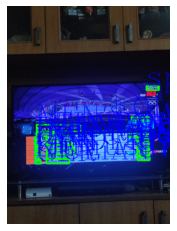

In [9]:
for t in text_detect:
    
    
    bbox, text, score = t
    
    if score > threshold:
        detected_text.append({'Text': text})
        bbox = [tuple(map(int, point)) for point in bbox]
        cv2.rectangle(img, bbox[0], bbox[2], (0,255,0),8)
        cv2.putText(img, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 5, (255,0,0), 2)
        
df_detected_text = pd.DataFrame(detected_text)
        
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.show

In [10]:
print(df_detected_text)    
    


                   Text
0                sports
1         Olympic Games
2   MEN'$ JAVELIN THROW
3             STANDINGS
4                 FINAL
5                    OR
6                92.97M
7                   PAK
8         ARSHAD NADEEM
9                89.45m
10                  IND
11        NEERAJ CHOPRA
12               88.50m
13                  CZE
14       JAKUB VADLEJCH
15               87.87M
16                  GRN
17      ANDERSON PETERS
18               87.72m
19                  KEN
20          Julius YEGO
21               87.33m
22                  GER
23         JULiAN WEBER
